# DNA Sequencing with machine learning
DNA sequence have complicated structure and classify them manually is like going to island far away from land by swimming.In this notebook, I will apply a classification model that can predict the class of the DNA based on the DNA sequence.

# Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
human_data=pd.read_table('../input/dna-sequence-dataset/human.txt')

In [3]:
human_data

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3
...,...,...
4375,ATGGAAGATTTGGAGGAAACATTATTTGAAGAATTTGAAAACTATT...,0
4376,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,6
4377,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,6
4378,ATGGGGCACCTGGTTTGCTGTCTGTGTGGCAAGTGGGCCAGTTACC...,6


In [4]:
human_data['class'].value_counts(normalize=True)

6    0.306621
4    0.162329
3    0.153425
1    0.121918
0    0.121233
2    0.079680
5    0.054795
Name: class, dtype: float64

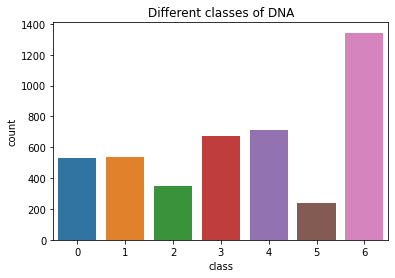

In [5]:
import warnings
warnings.filterwarnings(action='ignore')
sns.countplot(human_data['class'])
plt.title('Different classes of DNA')
plt.show()

Here, there are seven different classes of DNA, Our target is to predict theses classes.

In [6]:
human_data['sequence'][0]

'ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCCTTACACTATTCCTCATCACCCAACTAAAAATATTAAACACAAACTACCACCTACCTCCCTCACCAAAGCCCATAAAAATAAAAAATTATAACAAACCCTGAGAACCAAAATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG'

# Concept of k-mer counting
A challenge that remains is that none of these above methods results in vectors of uniform length, and that is a requirement for feeding data to a classification or regression algorithm. So with the above methods you have to resort to things like truncating sequences or padding with "n" or "0" to get vectors of uniform length.

DNA and protein sequences can be viewed metaphorically as the language of life. The language encodes instructions as well as function for the molecules that are found in all life forms. The sequence language analogy continues with the genome as the book, subsequences (genes and gene families) are sentences and chapters, k-mers and peptides (motifs) are words, and nucleotide bases and amino acids are the alphabet. Since the analogy seems so apt, it stands to reason that the amazing work done in the natural language processing field should also apply to the natural language of DNA and protein sequences.

The method I use here is simple and easy. I first take the long biological sequence and break it down into k-mer length overlapping “words”. For example, if I use "words" of length 6 (hexamers), “ATGCATGCA” becomes: ‘ATGCAT’, ‘TGCATG’, ‘GCATGC’, ‘CATGCA’. Hence our example sequence is broken down into 4 hexamer words.

# Now, let's define a function that will convert our sequence into k-mers

In [7]:
def getKmers(sequence, size=7):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

# Now, applying the function to the dataframe

In [8]:
%%time
human_data['words']=human_data['sequence'].apply(lambda x: getKmers(x))
human_data

CPU times: user 1.37 s, sys: 245 ms, total: 1.62 s
Wall time: 1.62 s


,sequence,class,words
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4,"[atgcccc, tgcccca, gccccaa, ccccaac, cccaact, ..."
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4,"[atgaacg, tgaacga, gaacgaa, aacgaaa, acgaaaa, ..."
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,"[atgtgtg, tgtgtgg, gtgtggc, tgtggca, gtggcat, ..."
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,"[atgtgtg, tgtgtgg, gtgtggc, tgtggca, gtggcat, ..."
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3,"[atgcaac, tgcaaca, gcaacag, caacagc, aacagca, ..."
...,...,...,...
4375,ATGGAAGATTTGGAGGAAACATTATTTGAAGAATTTGAAAACTATT...,0,"[atggaag, tggaaga, ggaagat, gaagatt, aagattt, ..."
4376,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,6,"[atgcagt, tgcagtc, gcagtcc, cagtcct, agtcctt, ..."
4377,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,6,"[atgcagt, tgcagtc, gcagtcc, cagtcct, agtcctt, ..."
4378,ATGGGGCACCTGGTTTGCTGTCTGTGTGGCAAGTGGGCCAGTTACC...,6,"[atggggc, tggggca, ggggcac, gggcacc, ggcacct, ..."


In [9]:
human_data=human_data.drop(columns='sequence',axis=1)
human_data

,class,words
0,4,"[atgcccc, tgcccca, gccccaa, ccccaac, cccaact, ..."
1,4,"[atgaacg, tgaacga, gaacgaa, aacgaaa, acgaaaa, ..."
2,3,"[atgtgtg, tgtgtgg, gtgtggc, tgtggca, gtggcat, ..."
3,3,"[atgtgtg, tgtgtgg, gtgtggc, tgtggca, gtggcat, ..."
4,3,"[atgcaac, tgcaaca, gcaacag, caacagc, aacagca, ..."
...,...,...
4375,0,"[atggaag, tggaaga, ggaagat, gaagatt, aagattt, ..."
4376,6,"[atgcagt, tgcagtc, gcagtcc, cagtcct, agtcctt, ..."
4377,6,"[atgcagt, tgcagtc, gcagtcc, cagtcct, agtcctt, ..."
4378,6,"[atggggc, tggggca, ggggcac, gggcacc, ggcacct, ..."


# Converting the whole k-mers words data into list of texts

In [10]:
human_texts = list(human_data['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])

In [11]:
human_texts[0]

'atgcccc tgcccca gccccaa ccccaac cccaact ccaacta caactaa aactaaa actaaat ctaaata taaatac aaatact aatacta atactac tactacc actaccg ctaccgt taccgta accgtat ccgtatg cgtatgg gtatggc tatggcc atggccc tggccca ggcccac gcccacc cccacca ccaccat caccata accataa ccataat cataatt ataatta taattac aattacc attaccc ttacccc taccccc accccca cccccat ccccata cccatac ccatact catactc atactcc tactcct actcctt ctcctta tccttac ccttaca cttacac ttacact tacacta acactat cactatt actattc ctattcc tattcct attcctc ttcctca tcctcat cctcatc ctcatca tcatcac catcacc atcaccc tcaccca cacccaa acccaac cccaact ccaacta caactaa aactaaa actaaaa ctaaaaa taaaaat aaaaata aaaatat aaatatt aatatta atattaa tattaaa attaaac ttaaaca taaacac aaacaca aacacaa acacaaa cacaaac acaaact caaacta aaactac aactacc actacca ctaccac taccacc accacct ccaccta cacctac acctacc cctacct ctacctc tacctcc acctccc cctccct ctccctc tccctca ccctcac cctcacc ctcacca tcaccaa caccaaa accaaag ccaaagc caaagcc aaagccc aagccca agcccat gcccata cccataa ccataaa cataaaa ataaaaa taaaaat

# Separating dependent variable

In [12]:
y=human_data['class'].values
y

array([4, 4, 3, ..., 6, 6, 6])

# Using converting words into vectors

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(human_texts)

In [14]:
X.shape

(4380, 602855)

# Splitting the data into train and test

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)

In [16]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3504, 602855) (876, 602855) (3504,) (876,)


# Applying xgboost model

In [17]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

[14:40:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [18]:
y_pred=xgb.predict(X_test)
y_pred

array([6, 1, 4, 3, 2, 6, 3, 4, 0, 1, 3, 0, 6, 6, 4, 3, 1, 1, 4, 2, 6, 3,
       0, 6, 6, 5, 0, 6, 6, 0, 1, 6, 1, 5, 6, 3, 3, 4, 4, 1, 2, 6, 5, 6,
       6, 4, 4, 3, 4, 0, 6, 1, 3, 6, 1, 4, 6, 4, 0, 6, 6, 4, 6, 0, 6, 0,
       1, 6, 6, 6, 2, 3, 4, 6, 4, 2, 4, 1, 6, 6, 0, 6, 6, 6, 3, 5, 6, 2,
       6, 4, 1, 3, 6, 1, 6, 6, 6, 0, 4, 6, 6, 3, 0, 2, 6, 6, 4, 2, 6, 0,
       1, 6, 6, 6, 0, 6, 6, 0, 6, 6, 2, 3, 6, 2, 4, 6, 2, 5, 4, 6, 6, 1,
       1, 6, 3, 4, 0, 3, 4, 3, 6, 6, 6, 6, 6, 6, 6, 6, 1, 2, 3, 1, 3, 5,
       6, 6, 2, 6, 6, 6, 6, 4, 6, 6, 3, 6, 2, 5, 2, 4, 0, 6, 6, 4, 6, 6,
       1, 0, 6, 2, 6, 1, 6, 3, 6, 6, 1, 6, 1, 2, 1, 0, 0, 3, 4, 0, 6, 6,
       6, 3, 6, 5, 6, 6, 3, 4, 6, 3, 4, 4, 6, 6, 0, 6, 1, 1, 6, 5, 6, 3,
       4, 1, 6, 6, 4, 2, 0, 6, 4, 0, 6, 0, 1, 6, 4, 3, 3, 0, 3, 5, 1, 2,
       4, 6, 6, 0, 0, 4, 6, 6, 4, 2, 3, 1, 1, 6, 3, 6, 1, 6, 3, 0, 6, 2,
       1, 2, 1, 6, 5, 6, 4, 6, 1, 2, 4, 6, 6, 6, 6, 0, 4, 6, 1, 4, 6, 3,
       6, 2, 3, 6, 0, 4, 1, 6, 1, 4, 6, 4, 5, 2, 5,

In [24]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_pred)

0.8835616438356164

# # Showing classification report to the viewer

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        99
           1       1.00      0.85      0.92       123
           2       0.98      0.90      0.94        72
           3       0.96      0.86      0.91       127
           4       0.94      0.81      0.87       156
           5       1.00      0.76      0.86        41
           6       0.74      0.98      0.85       258

    accuracy                           0.88       876
   macro avg       0.95      0.86      0.89       876
weighted avg       0.91      0.88      0.89       876



# Plotting heatmap of the confusion_matrix

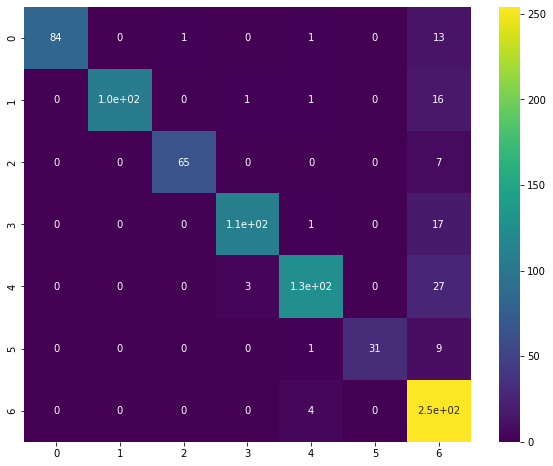

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='viridis')
plt.show()

******THE END.    PLEASE HIT UPVOTE